1. Loading the dataset

1.1. Launch commands to automatically reload modules

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1.2. Import the packages

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.3. Load the training and test dataset into a dataframes called df_train and df_test

In [6]:
df_train = pd.read_csv('../data/raw/train.csv',low_memory=False)
df_test = pd.read_csv('../data/raw/test.csv')

2. Exploring the dataset

In [7]:
# Display the dimensions of training dataset
df_train.shape

(46618, 64)

In [8]:
# Display the dimensions of test dataset
df_test.shape

(4970, 63)

In [11]:
#Display the descriptive statistics of training dataset
df_train.describe(include='all')

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
count,46618,46618,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,...,46576.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46618,46618.000000
unique,355,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20377,NaN
top,Army,A10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2336a719-c648-440c-821d-32fb0d9760bf,NaN
freq,176,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,NaN,NaN,23.542988,37.339013,91.784360,18.164578,44.424392,47.571397,5.654071,12.575102,...,-0.463778,0.778630,1.867124,2.645755,1.066943,0.527743,0.283606,5.732429,NaN,0.009524
std,NaN,NaN,10.076829,28.019801,30.235568,6.181982,18.026404,17.217909,9.985025,11.041089,...,3.303826,0.745045,1.464894,2.096319,1.170469,0.469654,0.422755,4.942544,NaN,0.097127
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,17.000000,9.600000,83.900000,14.600000,40.000000,43.770000,1.900000,8.400000,...,-1.747553,0.228600,0.681800,1.000000,0.217400,0.157900,0.000000,1.538500,NaN,0.000000
50%,NaN,NaN,28.000000,35.900000,97.000000,18.100000,47.500000,50.720000,4.500000,11.800000,...,-0.335180,0.550000,1.600000,2.235300,0.666700,0.419400,0.131600,4.428600,NaN,0.000000
75%,NaN,NaN,31.000000,62.200000,106.800000,21.800000,53.000000,55.947500,8.200000,15.900000,...,1.048375,1.129000,2.724100,3.806500,1.529000,0.793100,0.366700,9.033050,NaN,0.000000


In [12]:
#Display the descriptive statistics of test dataset
df_test.describe(include='all')

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
count,4970,4970,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,...,4969.000000,4969.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970
unique,347,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4970
top,Morgan St.,ACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00a16405-e17f-4b19-b7c0-c2de73b8361d
freq,19,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,15.865795,34.906881,89.500644,17.867626,43.657203,46.538342,5.168390,13.048753,...,-2.149284,-0.526065,0.697025,1.953592,2.650609,1.069840,0.529118,0.260375,5.753262,NaN
std,NaN,NaN,8.276655,27.921356,35.338827,6.780159,20.716630,19.992005,7.030561,9.248595,...,6.750792,3.920493,0.683636,1.533018,2.073589,1.153074,0.474838,0.380465,4.881835,NaN
min,NaN,NaN,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-62.101300,-31.594500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,9.000000,6.700000,80.900000,14.200000,38.400000,42.340000,1.400000,8.400000,...,-4.443960,-1.868180,0.200000,0.750000,1.000000,0.250000,0.142900,0.000000,1.602175,NaN
50%,NaN,NaN,17.000000,32.350000,96.800000,18.000000,48.100000,50.850000,3.700000,12.300000,...,-1.540360,-0.397400,0.500000,1.666700,2.260900,0.680000,0.428600,0.133300,4.535900,NaN
75%,NaN,NaN,22.000000,59.900000,107.100000,21.800000,54.000000,56.780000,7.400000,16.800000,...,1.103500,1.049540,1.000000,2.882400,3.800000,1.533300,0.807700,0.333300,9.000000,NaN


In [16]:
#summary of the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46618 entries, 0 to 46617
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 46618 non-null  object 
 1   conf                 46618 non-null  object 
 2   GP                   46618 non-null  int64  
 3   Min_per              46618 non-null  float64
 4   Ortg                 46618 non-null  float64
 5   usg                  46618 non-null  float64
 6   eFG                  46618 non-null  float64
 7   TS_per               46618 non-null  float64
 8   ORB_per              46618 non-null  float64
 9   DRB_per              46618 non-null  float64
 10  AST_per              46618 non-null  float64
 11  TO_per               46618 non-null  float64
 12  FTM                  46618 non-null  int64  
 13  FTA                  46618 non-null  int64  
 14  FT_per               46618 non-null  float64
 15  twoPM                46618 non-null 

In [17]:
#summary of the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 4970 non-null   object 
 1   conf                 4970 non-null   object 
 2   GP                   4970 non-null   int64  
 3   Min_per              4970 non-null   float64
 4   Ortg                 4970 non-null   float64
 5   usg                  4970 non-null   float64
 6   eFG                  4970 non-null   float64
 7   TS_per               4970 non-null   float64
 8   ORB_per              4970 non-null   float64
 9   DRB_per              4970 non-null   float64
 10  AST_per              4970 non-null   float64
 11  TO_per               4970 non-null   float64
 12  FTM                  4970 non-null   int64  
 13  FTA                  4970 non-null   int64  
 14  FT_per               4970 non-null   float64
 15  twoPM                4970 non-null   i

In [20]:
#To see if there are duplicate rows in training data
df_train.duplicated().sum()

np.int64(0)

In [21]:
#To see if there are duplicate rows in test data
df_test.duplicated().sum()

np.int64(0)

In [22]:
#To see if there are null values in training data
df_train.isna().sum()

team          0
conf          0
GP            0
Min_per       0
Ortg          0
             ..
stl          36
blk          36
pts          36
player_id     0
drafted       0
Length: 64, dtype: int64

In [23]:
#To see if there are null values in test data
df_test.isna().sum()

team         0
conf         0
GP           0
Min_per      0
Ortg         0
            ..
ast          0
stl          0
blk          0
pts          0
player_id    0
Length: 63, dtype: int64

<Axes: >

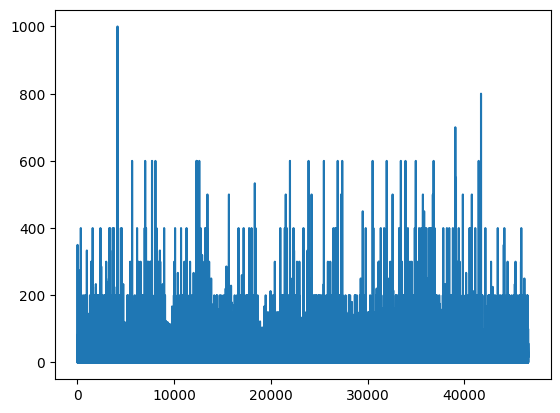

In [31]:
#explore the ftr column, since the meta data didn't describe of this column
ftr_column = df_train["ftr"]
ftr_column.plot()

<Axes: >

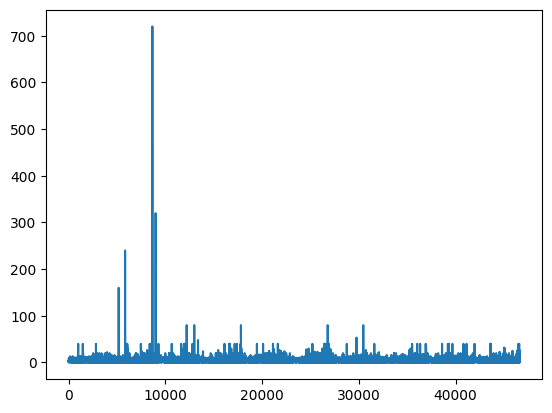

In [32]:
#explore the pfr column, since the meta data didn't describe of this column
pfr_column = df_train["pfr"]
pfr_column.plot()

3. Data Preperation

In [25]:
#copy the training dataframe to another dataframe which aims to be the cleaned dataset
df_train_cleaned = df_train.copy()

In [26]:
#copy the test dataframe to another dataframe which aims to be the cleaned dataset
df_test_cleaned = df_test.copy()

In [33]:
#cleaning data - Delete any missing values
df_train_cleaned = df_train_cleaned.dropna(axis='columns')
df_test_cleaned = df_test_cleaned.dropna(axis='columns')

In [34]:
# Print the columns with missing values in training data

[col for col in df_train_cleaned.columns if df_train_cleaned[col].isnull().any()]

[]

In [35]:
# Print the columns with missing values in test data

[col for col in df_test_cleaned.columns if df_test_cleaned[col].isnull().any()]

[]

In [ ]:
3.1 Target variable extraction


In [36]:
#Extract the column `drafted` and save it into a dataframe called `target`
target = df_train_cleaned.pop('drafted')

<Axes: >

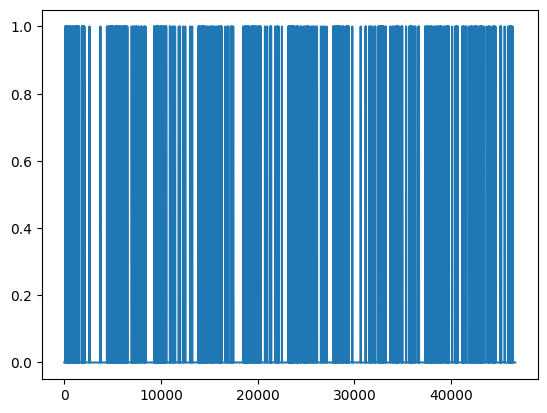

In [42]:
target.plot()